<a href="https://colab.research.google.com/github/poojabongale/Fish-Image-Classification/blob/main/Fish_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiclass Fish Image Classification**

This project focuses on classifying fish images into multiple categories using deep learning models.

# **GitHub Link**

# **Importing Libraries**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import (
    VGG16,
    ResNet50,
    MobileNetV2,
    InceptionV3,
    EfficientNetB0
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving Dataset.zip to Dataset.zip


In [ ]:
# Loading the dataset from the zip file
import zipfile
import os

zip_path = "/content/Dataset.zip"
extract_to = "fish_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete!")


Extraction complete!


In [ ]:
base_path = "fish_data/images.cv_jzk6llhf18tm3k0kyttxz/data"
train_dir = os.path.join(base_path, "train")
val_dir   = os.path.join(base_path, "val")
test_dir  = os.path.join(base_path, "test")


In [ ]:
os.listdir(train_dir)

['animal fish',
 'fish sea_food hourse_mackerel',
 'fish sea_food striped_red_mullet',
 'fish sea_food sea_bass',
 'fish sea_food red_sea_bream',
 'animal fish bass',
 'fish sea_food trout',
 'fish sea_food red_mullet',
 'fish sea_food black_sea_sprat',
 'fish sea_food gilt_head_bream',
 'fish sea_food shrimp']

In [ ]:
#To check if the path exists
print("Train Exists:", os.path.exists(train_dir))


Train Exists: True


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'fish_data/images.cv_jzk6llhf18tm3k0kyttxz/data/train'  # update this to your dataset path
#This code tries to rescale the image,fetch it from the directory, batch_size = 16 means each batch has 16images
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Get class indices
class_indices = train_generator.class_indices
print(class_indices)

# Convert to class names list
class_names = list(class_indices.keys())
print("Class names:", class_names)

Found 6225 images belonging to 11 classes.
{'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}
Class names: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


# **Initializing data generators**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)#Define the image size i.e 224 X 224 pixels
BATCH_SIZE = 16 #Each batch has 16images

train_datagen = ImageDataGenerator(
    rescale=1./255, #Rescaling the image
    rotation_range=20, #Rotating the image by 20 degree
    zoom_range=0.2, #Zoom the image by 20%
    horizontal_flip=True #Flip the image horizontally
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


# **CNN from Scratch**
This tells the model how many output categories (i.e., types of fish) exist in the dataset.For example, if you're classifying 7 fish types, then num_classes = 7.
model.Sequential : This is an API built over tensorflow that provides a straightforward way to construct neural networks by stacking layers in a linear fashion.

Input shape = image dimensions: 224x224 pixels, 3 channels (RGB).

Conv2D: Applies 32 filters of size 3x3 to detect local patterns in the image (edges, shapes).

ReLU: Non-linear activation that keeps positive values and sets negatives to zero.

MaxPooling: Reduces spatial dimensions by taking the max in each 2x2 block, making the model faster and less prone to overfitting.

64 filters now — the deeper you go, the more abstract the features learned.

Flatten: Converts the 2D feature maps into a 1D vector.

Dense(128): Fully connected layer with 128 neurons.

Dropout(0.5): Randomly disables 50% of neurons during training to prevent overfitting.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Number of classes from the training generator
num_classes = train_generator.num_classes

model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


# **Compile the model**

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# **Train the model**

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 843s 2s/step - accuracy: 0.2861 - loss: 2.0552 - val_accuracy: 0.6410 - val_loss: 1.1468
Epoch 2/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 839s 2s/step - accuracy: 0.5084 - loss: 1.3568 - val_accuracy: 0.7601 - val_loss: 0.8376
Epoch 3/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 869s 2s/step - accuracy: 0.6352 - loss: 1.0166 - val_accuracy: 0.8132 - val_loss: 0.5767
Epoch 4/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 835s 2s/step - accuracy: 0.7006 - loss: 0.8126 - val_accuracy: 0.8242 - val_loss: 0.5287
Epoch 5/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 833s 2s/step - accuracy: 0.7422 - loss: 0.7198 - val_accuracy: 0.9066 - val_loss: 0.3983
Epoch 6/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 839s 2s/step - accuracy: 0.7763 - loss: 0.6057 - val_accuracy: 0.8929 - val_loss: 0.3257
Epoch 7/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 833s 2s/step - accuracy: 0.8125 - loss: 0.5445 - val_accuracy: 0.9267 - val_loss: 0.2560
Epoch 8/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 832s 2s/step - accuracy: 0.8116 - loss: 0.5311 - val_accu

# **Plot for Accuracy and loss**

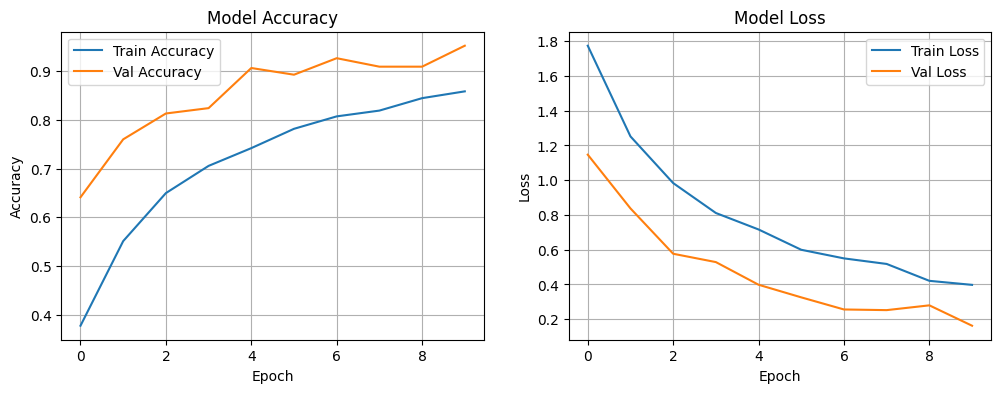

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Here we can see the accuracy increases over each epoch and the loss decreases over each epoch which is a good sign.

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 539ms/step - accuracy: 0.9652 - loss: 0.1673
Test Accuracy: 0.9605
Test Loss: 0.1597


# **VGC16 Model**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

# Load base model
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# Final model
vgg_model = Model(inputs=base_model.input, outputs=output)

# Compile
vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_vgg = vgg_model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    steps_per_epoch=100,  # Optional for speed
    validation_steps=50
)

# Evaluate
test_loss, test_acc = vgg_model.evaluate(test_generator)
print(f"VGG16 Test Accuracy: {test_acc:.4f}")

# Save model
vgg_model.save("vgg16_fish_model.h5")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_11']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1347s 13s/step - accuracy: 0.2426 - loss: 2.4352 - val_accuracy: 0.5163 - val_loss: 1.5060
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1335s 13s/step - accuracy: 0.3251 - loss: 1.7542 - val_accuracy: 0.6375 - val_loss: 1.3709
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1344s 13s/step - accuracy: 0.3571 - loss: 1.6716 - val_accuracy: 0.6650 - val_loss: 1.2531
Epoch 4/5
 90/100 ━━━━━━━━━━━━━━━━━━━━ 1:28 9s/step - accuracy: 0.3914 - loss: 1.5800

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1280s 13s/step - accuracy: 0.3938 - loss: 1.5747 - val_accuracy: 0.7025 - val_loss: 1.1565
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1320s 13s/step - accuracy: 0.4074 - loss: 1.4848 - val_accuracy: 0.7600 - val_loss: 1.0321
200/200 ━━━━━━━━━━━━━━━━━━━━ 1730s 9s/step - accuracy: 0.8537 - loss: 0.7046


VGG16 Test Accuracy: 0.7499


In [ ]:
#Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Step 1: Get predictions
y_pred_probs = vgg_model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = test_generator.classes  # True class indices

class_labels = list(test_generator.class_indices.keys())

#Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

#Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
plt.figure(figsize=(12, 10))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


# **ResNet50 Model**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load base model
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# Final model
resnet_model = Model(inputs=base_model.input, outputs=output)

# Compile
resnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_resnet = resnet_model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

# Evaluate
loss, acc = resnet_model.evaluate(test_generator)
print(f"ResNet50 Accuracy: {acc:.4f}")

# Save model
resnet_model.save("resnet50_fish_model.h5")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_11']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


390/390 ━━━━━━━━━━━━━━━━━━━━ 1492s 4s/step - accuracy: 0.1469 - loss: 2.4125 - val_accuracy: 0.1712 - val_loss: 2.2671
Epoch 2/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 1538s 4s/step - accuracy: 0.1784 - loss: 2.2701 - val_accuracy: 0.1685 - val_loss: 2.1864
Epoch 3/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 1477s 4s/step - accuracy: 0.1733 - loss: 2.2136 - val_accuracy: 0.1767 - val_loss: 2.1764
Epoch 4/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 1532s 4s/step - accuracy: 0.1743 - loss: 2.1791 - val_accuracy: 0.1859 - val_loss: 2.1003
Epoch 5/5
390/390 ━━━━━━━━━━━━━━━━━━━━ 1494s 4s/step - accuracy: 0.1999 - loss: 2.1544 - val_accuracy: 0.1813 - val_loss: 2.0796
200/200 ━━━━━━━━━━━━━━━━━━━━ 615s 3s/step - accuracy: 0.4099 - loss: 1.7492


ResNet50 Accuracy: 0.1829


200/200 ━━━━━━━━━━━━━━━━━━━━ 109s 544ms/step


<Figure size 1200x1000 with 0 Axes>

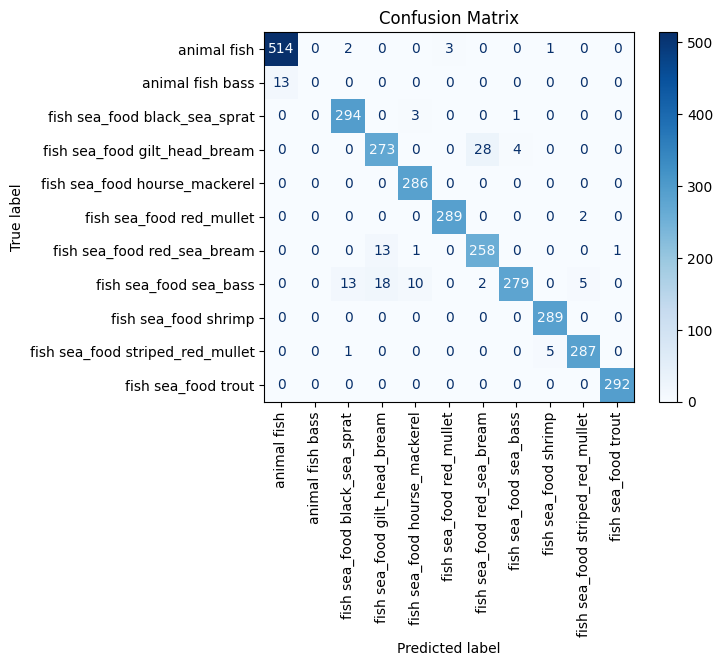


Classification Report:

                                  precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.95      0.99      0.97       298
   fish sea_food gilt_head_bream       0.90      0.90      0.90       305
   fish sea_food hourse_mackerel       0.95      1.00      0.98       286
        fish sea_food red_mullet       0.99      0.99      0.99       291
     fish sea_food red_sea_bream       0.90      0.95      0.92       273
          fish sea_food sea_bass       0.98      0.85      0.91       327
            fish sea_food shrimp       0.98      1.00      0.99       289
fish sea_food striped_red_mullet       0.98      0.98      0.98       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                           0.96      3187
           

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Step 1: Get predictions
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = test_generator.classes  # True class indices

class_labels = list(test_generator.class_indices.keys())

#Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

#Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
plt.figure(figsize=(12, 10))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


# **MobileNetV2**

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load base model (pre-trained on ImageNet)
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_tensor=Input(shape=(224, 224, 3))
)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# Define final model
mobilenet_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
mobilenet_model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('mobilenetv2_fish_model.h5', save_best_only=True)
]

# Train the model
history_mobilenet = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=callbacks,
    steps_per_epoch=100,  # Optional for speed
    validation_steps=50
)

# Evaluate the model
loss, acc = mobilenet_model.evaluate(test_generator)
print(f"MobileNetV2 Accuracy: {acc:.4f}")


/tmp/ipython-input-3872241711.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_213']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.4390 - loss: 1.7707

100/100 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.4408 - loss: 1.7649 - val_accuracy: 0.9425 - val_loss: 0.3279
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 901ms/step - accuracy: 0.8269 - loss: 0.5496

100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.8270 - loss: 0.5490 - val_accuracy: 0.9488 - val_loss: 0.2371
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 911ms/step - accuracy: 0.8888 - loss: 0.3654

100/100 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.8888 - loss: 0.3653 - val_accuracy: 0.9600 - val_loss: 0.1574
Epoch 4/5
 90/100 ━━━━━━━━━━━━━━━━━━━━ 8s 842ms/step - accuracy: 0.9004 - loss: 0.3212

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9000 - loss: 0.3206 - val_accuracy: 0.9663 - val_loss: 0.1187
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - accuracy: 0.8963 - loss: 0.3148

100/100 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.8965 - loss: 0.3144 - val_accuracy: 0.9700 - val_loss: 0.0925
200/200 ━━━━━━━━━━━━━━━━━━━━ 125s 623ms/step - accuracy: 0.9828 - loss: 0.0733
MobileNetV2 Accuracy: 0.9783


In [ ]:
mobilenet_model.save("mobilenetv2_fish_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_213']
Received: inputs=Tensor(shape=(16, 224, 224, 3))
  warnings.warn(msg)


199/200 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_213']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


200/200 ━━━━━━━━━━━━━━━━━━━━ 127s 630ms/step


<Figure size 1200x1000 with 0 Axes>

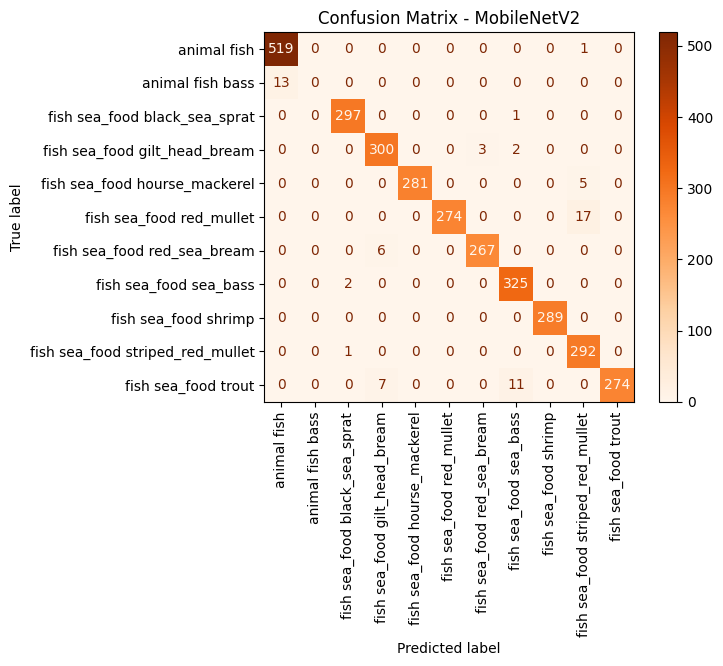


Classification Report - MobileNetV2:

                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.99      1.00      0.99       298
   fish sea_food gilt_head_bream       0.96      0.98      0.97       305
   fish sea_food hourse_mackerel       1.00      0.98      0.99       286
        fish sea_food red_mullet       1.00      0.94      0.97       291
     fish sea_food red_sea_bream       0.99      0.98      0.98       273
          fish sea_food sea_bass       0.96      0.99      0.98       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.93      1.00      0.96       293
             fish sea_food trout       1.00      0.94      0.97       292

                        accuracy                           0.98      31

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#Predict on test data
y_pred_probs = mobilenet_model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

#Confusion matrix
cm = confusion_matrix(y_true, y_pred)

#Plot confusion matrix
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Oranges, xticks_rotation=90)
plt.title("Confusion Matrix - MobileNetV2")
plt.grid(False)
plt.show()

print("\nClassification Report - MobileNetV2:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


# **EfficientNetB0**

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

# Load EfficientNetB0 base model
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_tensor=Input(shape=(224, 224, 3))
)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# Define model
efficient_model = Model(inputs=base_model.input, outputs=output)

# Compile
efficient_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ModelCheckpoint('efficientnetb0_fish_model.h5', save_best_only=True)
]

# Train
history_efficient = efficient_model.fit(
    train_generator,  # use image size (224, 224)
    validation_data=val_generator,
    epochs=5,
    callbacks=callbacks,
    steps_per_epoch=100,  # Optional for speed
    validation_steps=50

)

# Evaluate
loss, acc = efficient_model.evaluate(test_generator)
print(f"EfficientNetB0 Accuracy: {acc:.4f}")


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_371']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1360 - loss: 2.4154

100/100 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.1361 - loss: 2.4150 - val_accuracy: 0.1725 - val_loss: 2.3228
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1525 - loss: 2.3392

100/100 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.1525 - loss: 2.3392 - val_accuracy: 0.1750 - val_loss: 2.3206
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1763 - loss: 2.3139

100/100 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.1762 - loss: 2.3139 - val_accuracy: 0.1725 - val_loss: 2.3190
Epoch 4/5
 90/100 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.1374 - loss: 2.3501

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.1397 - loss: 2.3489 - val_accuracy: 0.1725 - val_loss: 2.3137
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1910 - loss: 2.3103

100/100 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.1909 - loss: 2.3104 - val_accuracy: 0.1713 - val_loss: 2.3105
200/200 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.4542 - loss: 2.1480
EfficientNetB0 Accuracy: 0.1632


In [ ]:
efficient_model.save("Efficient_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_371']
Received: inputs=Tensor(shape=(16, 224, 224, 3))
  warnings.warn(msg)


199/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_371']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


200/200 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step


<Figure size 1200x1000 with 0 Axes>

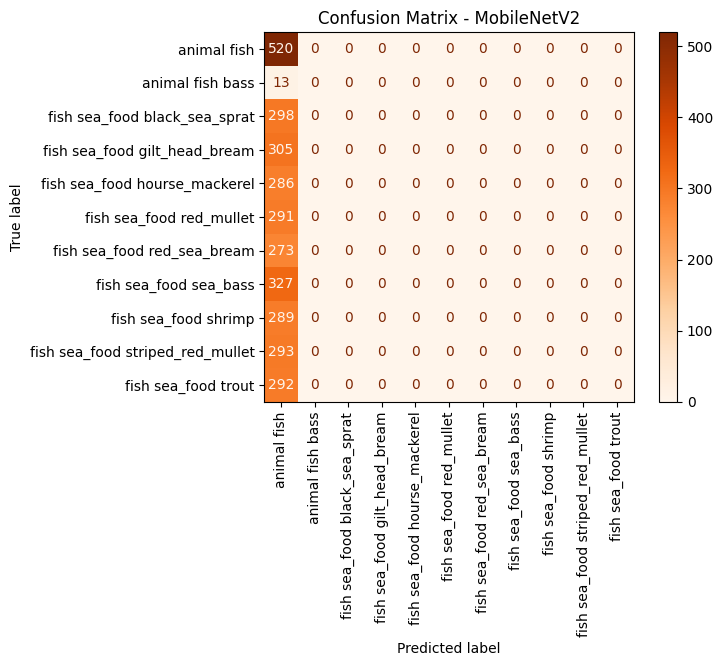


Classification Report - MobileNetV2:

                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00       293
             fish sea_food trout       0.00      0.00      0.00       292

                        accuracy                           0.16      31

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_probs = efficient_model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

#Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Oranges, xticks_rotation=90)
plt.title("Confusion Matrix - MobileNetV2")
plt.grid(False)
plt.show()

print("\nClassification Report - MobileNetV2:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


# **InceptionV3**

In [ ]:
IMG_SIZE = (299, 299)  # For InceptionV3

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load InceptionV3 base model
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_tensor=Input(shape=(299, 299, 3))
)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

# Define model
inception_model = Model(inputs=base_model.input, outputs=output)

# Compile
inception_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ModelCheckpoint('inceptionv3_fish_model.h5', save_best_only=True)
]

# Train
history_inception = inception_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=callbacks,
    steps_per_epoch=100,  # Optional for speed
    validation_steps=50
)

# Evaluate
loss, acc = inception_model.evaluate(test_generator)
print(f"InceptionV3 Accuracy: {acc:.4f}")


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_613']
Received: inputs=Tensor(shape=(None, 299, 299, 3))
  warnings.warn(msg)


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4026 - loss: 1.8130

100/100 ━━━━━━━━━━━━━━━━━━━━ 714s 7s/step - accuracy: 0.4041 - loss: 1.8084 - val_accuracy: 0.9112 - val_loss: 0.5599
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7485 - loss: 0.8262

100/100 ━━━━━━━━━━━━━━━━━━━━ 680s 7s/step - accuracy: 0.7486 - loss: 0.8258 - val_accuracy: 0.9125 - val_loss: 0.4311
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8086 - loss: 0.6274

100/100 ━━━━━━━━━━━━━━━━━━━━ 746s 7s/step - accuracy: 0.8087 - loss: 0.6268 - val_accuracy: 0.9400 - val_loss: 0.2570
Epoch 4/5
 90/100 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.8738 - loss: 0.4304

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 686s 7s/step - accuracy: 0.8727 - loss: 0.4320 - val_accuracy: 0.9488 - val_loss: 0.2325
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8604 - loss: 0.4021

100/100 ━━━━━━━━━━━━━━━━━━━━ 696s 7s/step - accuracy: 0.8607 - loss: 0.4017 - val_accuracy: 0.9525 - val_loss: 0.1841
200/200 ━━━━━━━━━━━━━━━━━━━━ 858s 4s/step - accuracy: 0.9766 - loss: 0.1295
InceptionV3 Accuracy: 0.9655


In [ ]:
inception_model.save("inception_model_fish_data.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_613']
Received: inputs=Tensor(shape=(16, 299, 299, 3))
  warnings.warn(msg)


199/200 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_613']
Received: inputs=Tensor(shape=(None, 299, 299, 3))
  warnings.warn(msg)


200/200 ━━━━━━━━━━━━━━━━━━━━ 867s 4s/step


<Figure size 1200x1000 with 0 Axes>

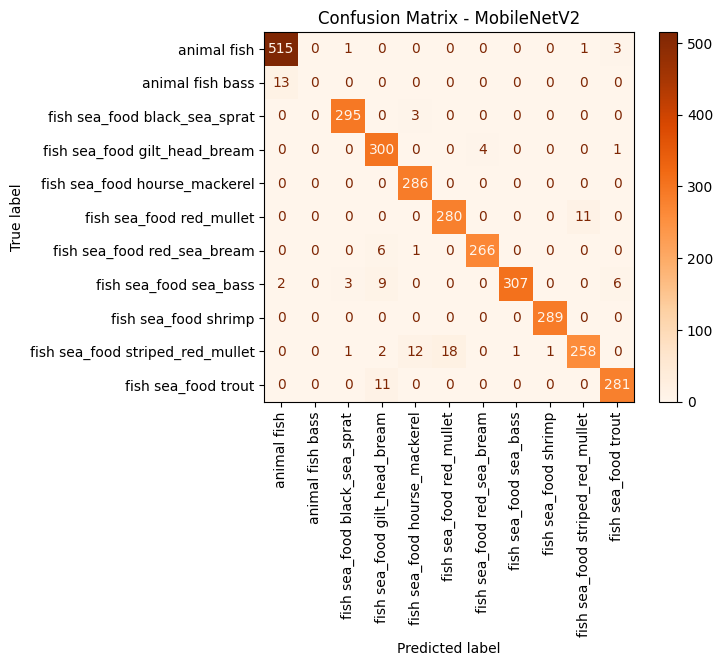


Classification Report - MobileNetV2:

                                  precision    recall  f1-score   support

                     animal fish       0.97      0.99      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.98      0.99      0.99       298
   fish sea_food gilt_head_bream       0.91      0.98      0.95       305
   fish sea_food hourse_mackerel       0.95      1.00      0.97       286
        fish sea_food red_mullet       0.94      0.96      0.95       291
     fish sea_food red_sea_bream       0.99      0.97      0.98       273
          fish sea_food sea_bass       1.00      0.94      0.97       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.96      0.88      0.92       293
             fish sea_food trout       0.97      0.96      0.96       292

                        accuracy                           0.97      31

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_probs = inception_model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

#Confusion matrix
cm = confusion_matrix(y_true, y_pred)

#Plot confusion matrix
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Oranges, xticks_rotation=90)
plt.title("Confusion Matrix - MobileNetV2")
plt.grid(False)
plt.show()

print("\nClassification Report - MobileNetV2:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


# **Comparing all the models**

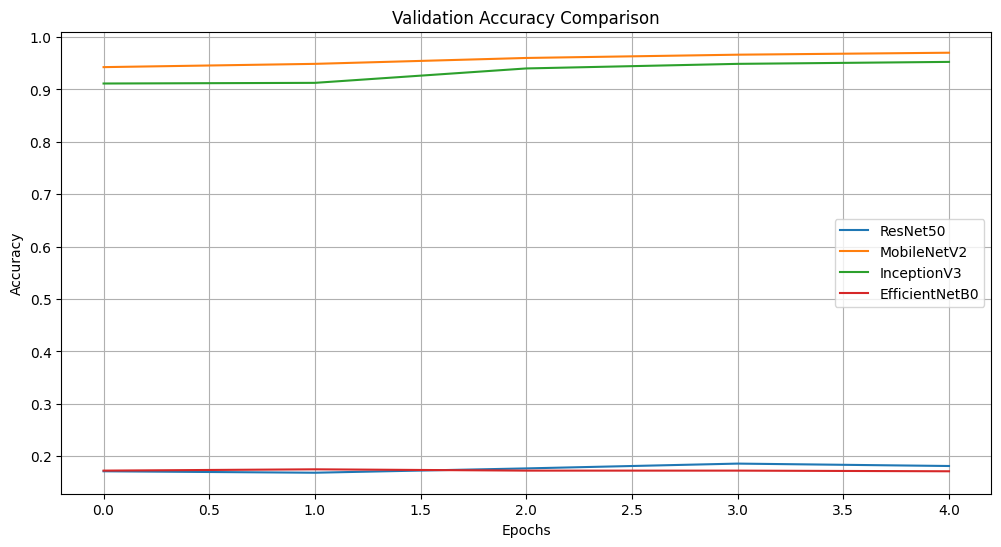

In [ ]:
import matplotlib.pyplot as plt

# Dictionary of correct history objects
histories = {
    "ResNet50": history_resnet,
    "MobileNetV2": history_mobilenet,
    "InceptionV3": history_inception,
    "EfficientNetB0": history_efficient
}

# Plot validation accuracy comparison
plt.figure(figsize=(12, 6))
for model_name, hist in histories.items():
    if hasattr(hist, 'history'):  # Safely check if it is a history object
        plt.plot(hist.history['val_accuracy'], label=f"{model_name}")
    else:
        print(f"Skipping {model_name} – Not a valid history object")

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Here this plot tells the performance of all the models. MobileNetv2 has the highest accuracy followed by InceptionV3. Least accuracy is of ResNet50 and EfficientNetB0.